<a href="https://colab.research.google.com/github/jamesleeeee/Lee/blob/main/wine_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

필요한 모듈 및 라이브러리 불러오기

In [1]:
# 계산 라이브러리
import numpy as np 
import pandas as pd
# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
%matplotlib inline
#모델  라이브러리 
from sklearn import linear_model


데이터 불러오기 및 전처리


#1. fixed acidity(주석산)
#2. volatile acidity (초산)
#3  citric acid(구연산)
#4. residual sugar(당도)
#5. chlorides(염화물(소금))
#6. free sulfur dioxide (자유 이산화황)
#7. total sulfur dioxide( 총 이산화황)
#8. density(밀도)
#9. ph(산도)
#10. sulphates(황산칼륨)
#11. alcohol(알코올 도수)
#12. quality(품질 0~10)




In [2]:
wine = pd.read_csv('/content/drive/MyDrive/wine/winequality-white.csv')

In [3]:
wine.info() #데이터 결측치는 따로 존재하지 않는다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
wine.head() # 5개의 데이터만 출력

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
wine['quality'].value_counts().sort_values(ascending=False).to_frame() #wine 의 범주인 quality에 값별 데이타 수 

,quality
6,2198
5,1457
7,880
8,175
4,163
3,20
9,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


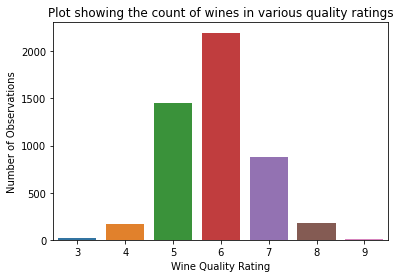

In [7]:
sns.countplot('quality',data=wine) #quality 분포를 알 수 있다.
plt.title('Plot showing the count of wines in various quality ratings')
plt.xlabel('Wine Quality Rating')
plt.ylabel('Number of Observations')
plt.show() # 데이터의 불균형이 심한데, 이는 등급사이에 많은 차이가 있음을 의미

In [8]:
target = 'quality'
features_list = list(wine.columns)
features_list.remove(target)

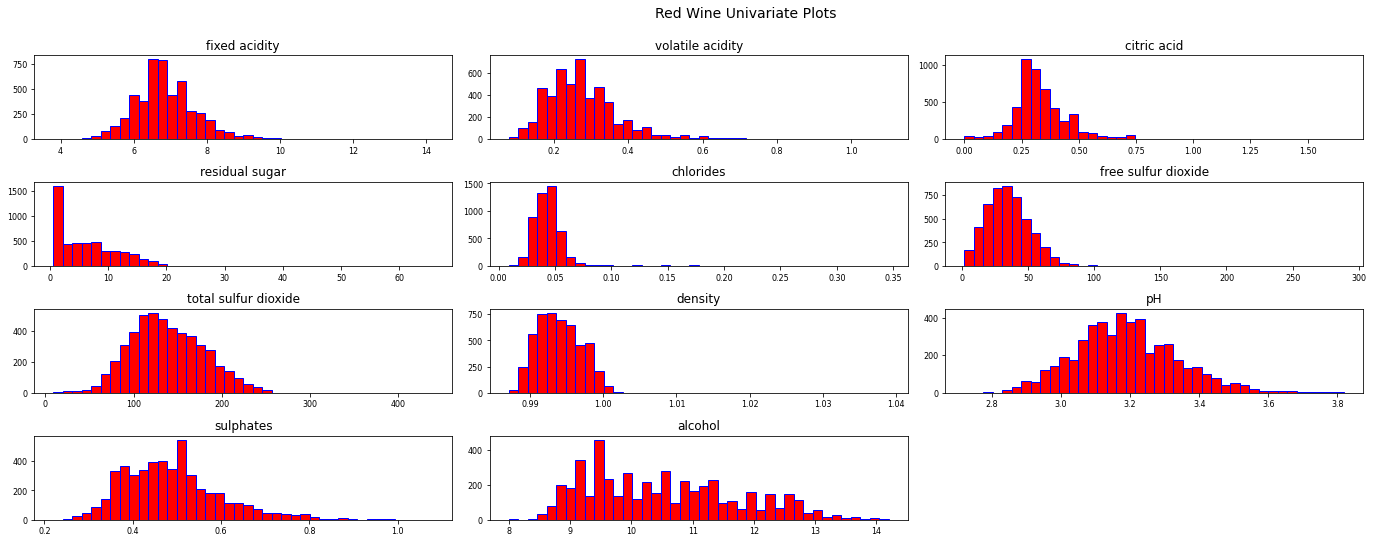

In [9]:
#quality값을 제외한 각 변수들 분포
wine[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=14);  
#예를 들어 '이산화황' 또는 '황산염'과 같은 일부 기능은 오른쪽으로 치우친 분포를 가지며 실제 컨텍스트에서 더 나은 결과를 위해 로그 형식으로 설계되어야 합니다.
#

각 변수별 상관관계 조사

In [10]:
wine.corr()['quality'].sort_values(ascending=False) #quality와 각변수들의 상관관계 조사.

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

In [11]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


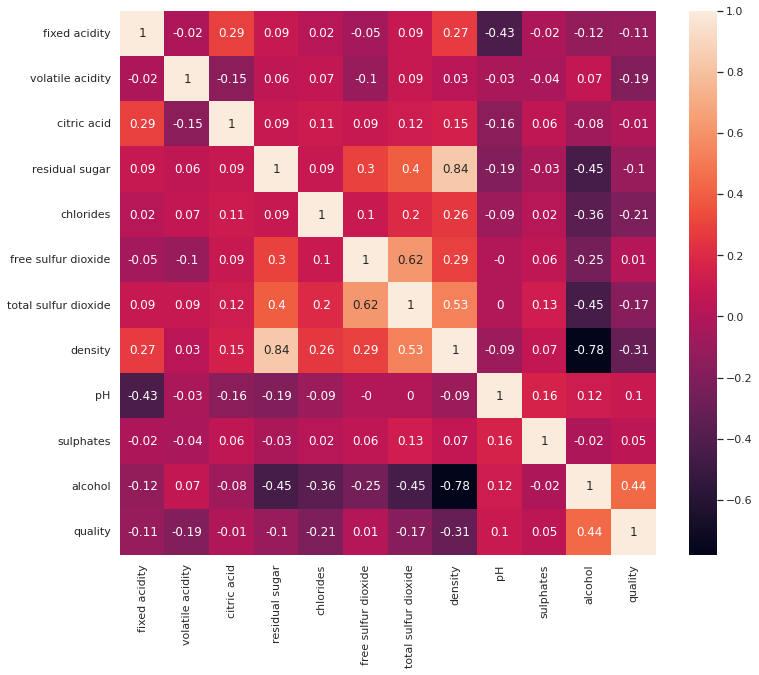

In [13]:
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,10)})
correlation_matrix = wine.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)
plt.show()
#알코올과 퀄리티는 강한 상관계수를 가지고 있음을 알 수 있다.
#와인의 PH와 fixed acidity에도 어느정도 상관계수가 있음을 알 수 있다.  ->당연한거임 
#구연산과 황산칼륨 자유 이산화황는 quality와 큰 관계가 없어보임. 
#밀도와 당도, 밀도와 알코올에도 자기상관존재 하므로 

알코올과 품질 그래프

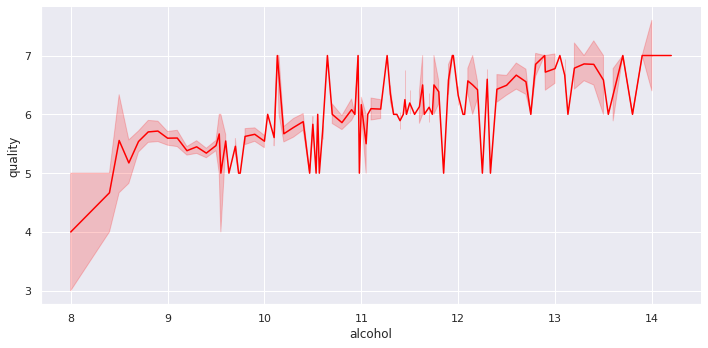

In [14]:
sns.set()
sns.relplot(data=wine, x='alcohol', y=target, kind='line', height=5, aspect=2, color='red');  
#양의 상관관계를 가진다.  H0 알콜과 품질이 따른 양의상관관계또한 구할 수 있음. 

밀도와 품질 그래프

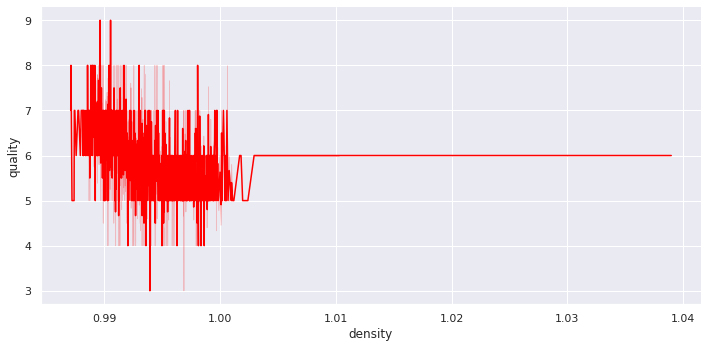

In [23]:
sns.set()
sns.relplot(data=wine, x='density', y=target, kind='line', height=5 , aspect=2, color='red');  

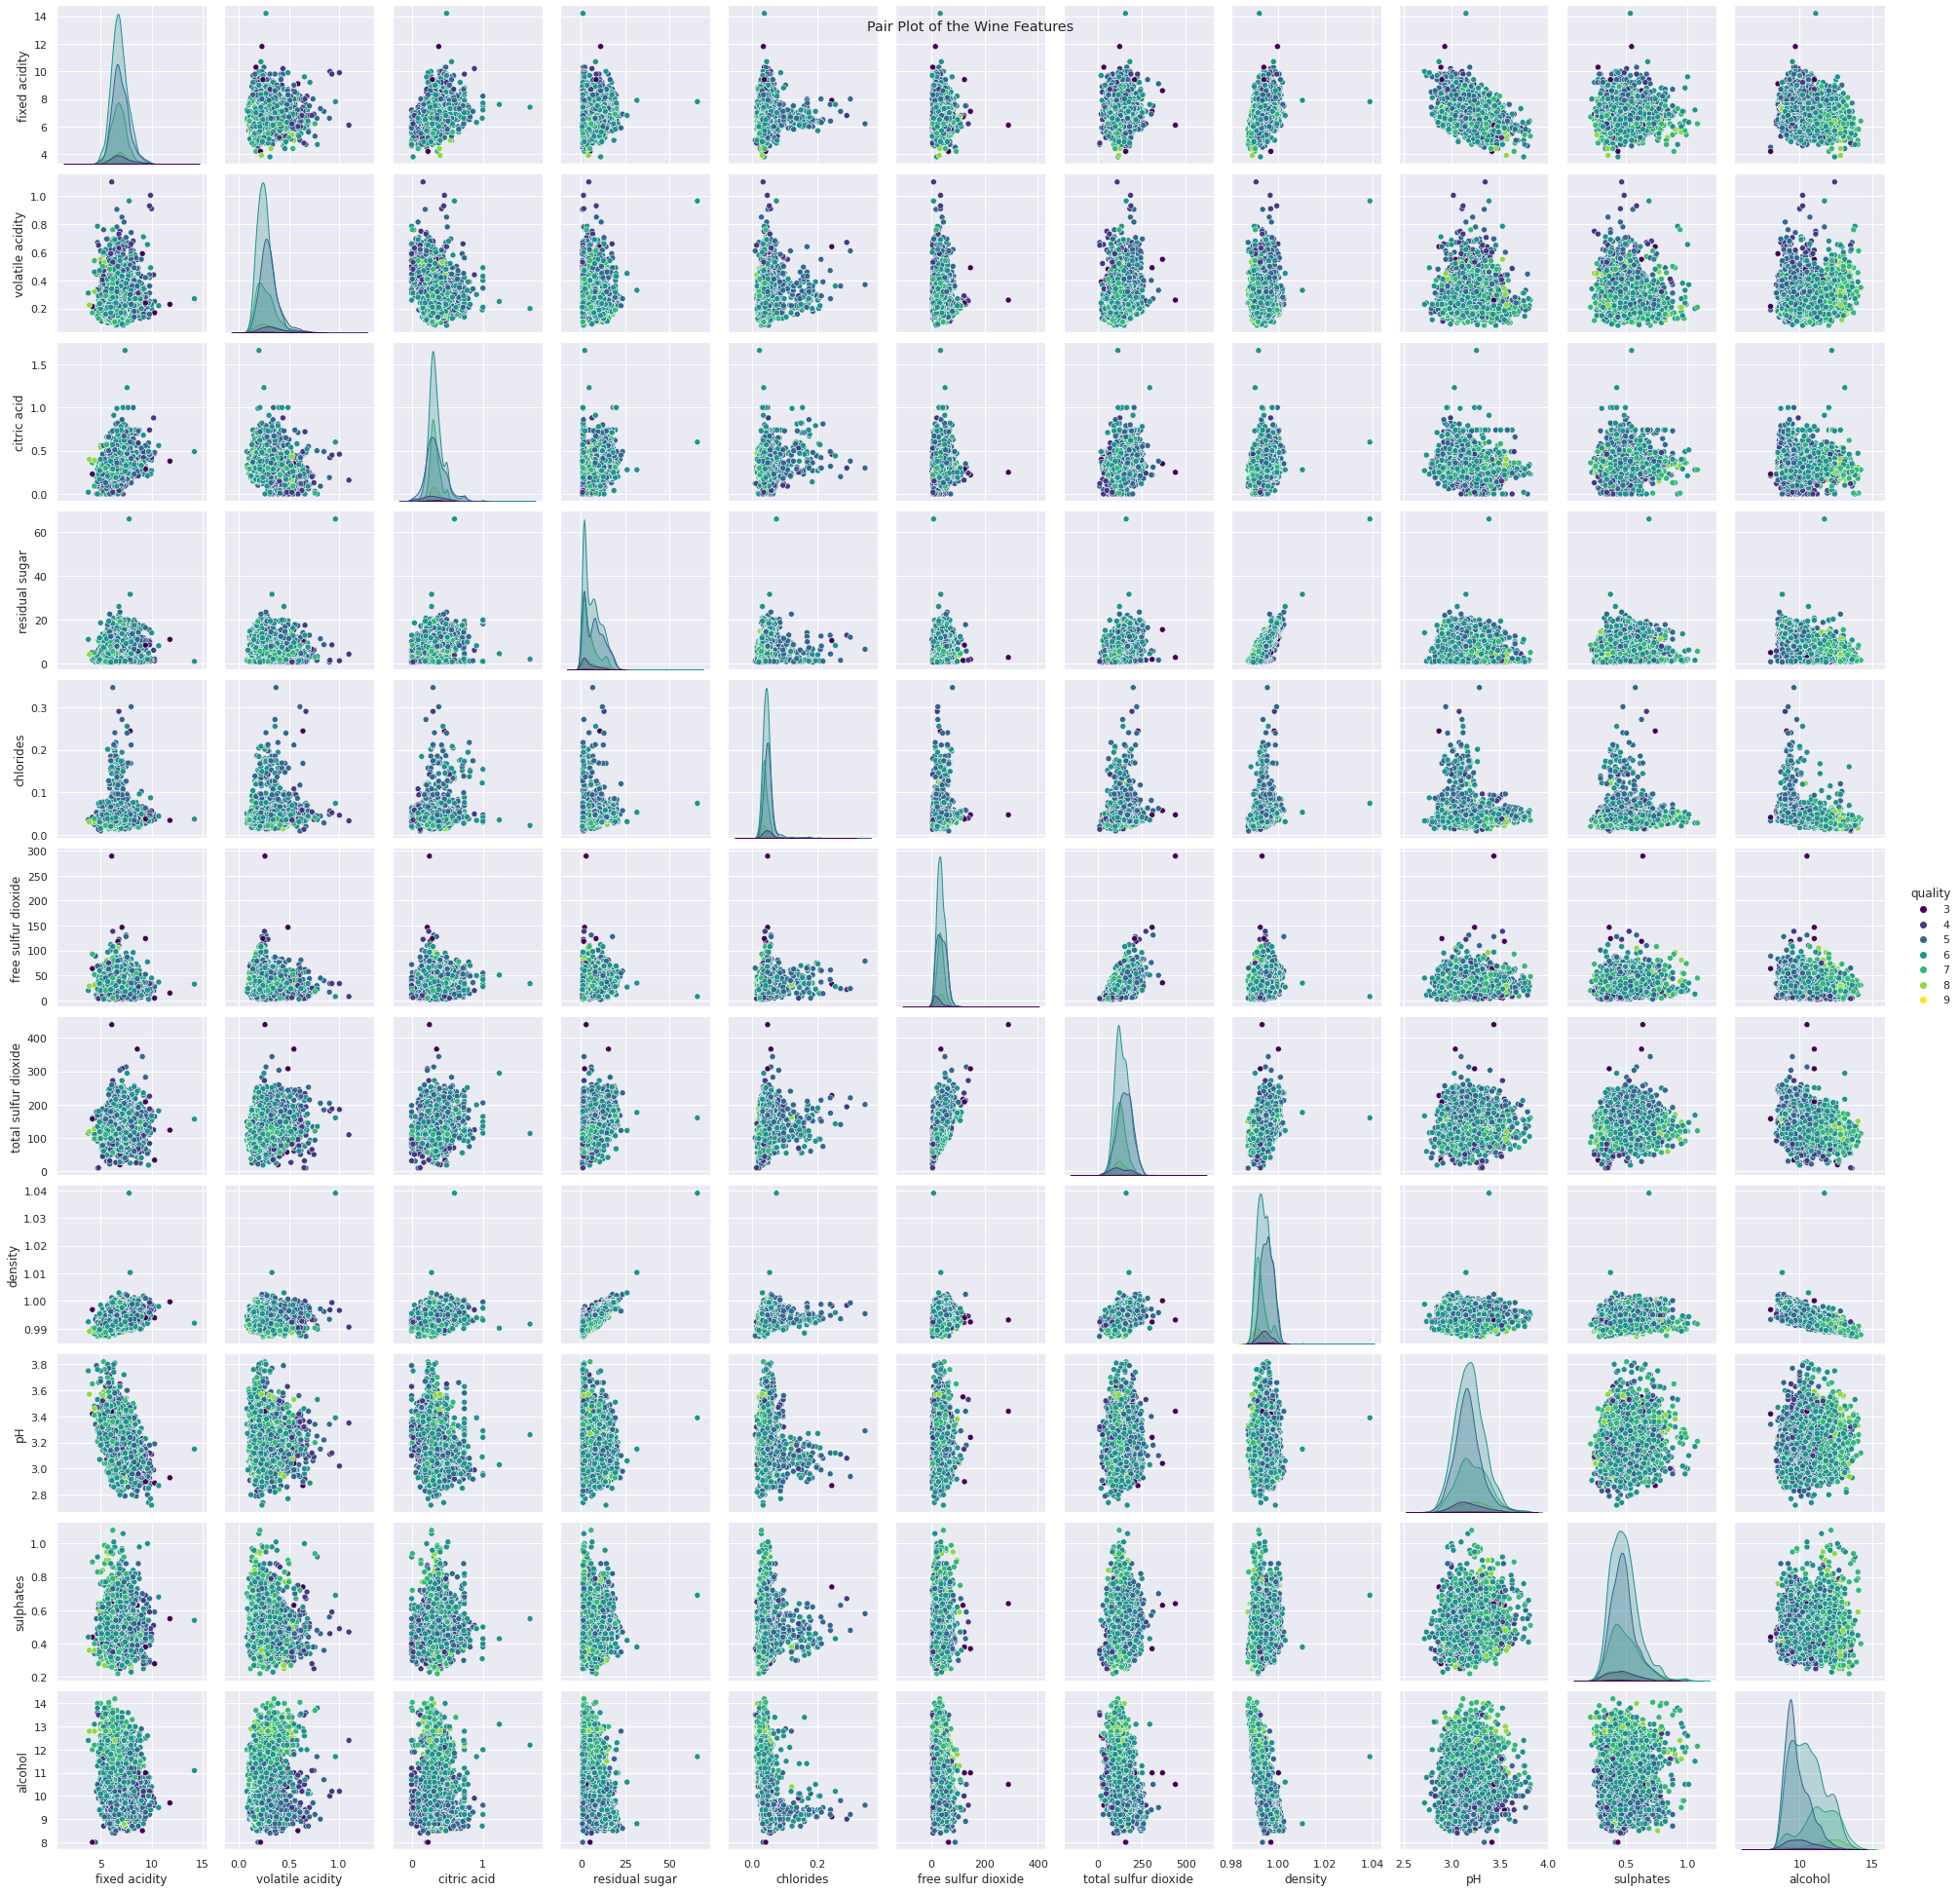

In [15]:
g = sns.pairplot(data=wine,hue='quality',palette='viridis') #wine quality 는 범주형이므로 숫자로 표현
g.fig.suptitle('Pair Plot of the Wine Features')
plt.show() 

#변수 제거 없이 선형 회귀모형 적합.



In [16]:
X = wine.drop([ 'quality'], axis=1) # X데이터에 반응변수  quality 제거 = 독립변수
Y = wine['quality'] #반응변수

In [17]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [18]:
#모델링
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train,Y_train)
y_pred = regr.predict(X_test) 

In [19]:
#점수확인
score =regr.score(X_train,Y_train)
print(score)
score =regr.score(X_test,Y_test)
print(score)
#처음시행시 :(0.2804...,0.2848... 

0.2855568201229166
0.261700428733716


RMSE

In [20]:
from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(Y_test,y_pred))
print('RMSE =',rmse)

RMSE = 0.7456289195487882


산점도

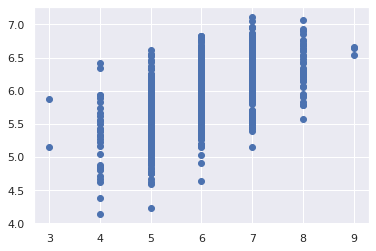

In [49]:
plt.scatter(Y_test,y_pred)
plt.show()

#quality와 상관관계 낮은 변수 제거 및 자기상관 변수 제거 후 회귀모델 분석


In [24]:
X1= wine.drop([ 'quality','citric acid','sulphates','free sulfur dioxide','density'] ,axis=1) 
# X데이터에 구연산과 황산칼륨, 자유 이산화황 데이터 삭제"
Y1 = wine['quality'] #반응변수

In [25]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y1,test_size=0.2)

In [26]:
#모델링
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train,Y_train)
y_pred = regr.predict(X_test)

In [27]:
#점수 확인
score =regr.score(X_train,Y_train)
print(score)
score =regr.score(X_test,Y_test)
print(score)
#이게 quality랑 상관계수 높은거랑 + density 제거한 선형 회귀 적합했을 때 score 값 
#점수는 비슷하지만 간단한 모델을 선호 

0.2638579229279654
0.26845077472793966


In [28]:
from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(Y_test,y_pred))
print('RMSE =',rmse) #RMSE는 0.3 정도 낮아졌따.

RMSE = 0.7610417354412611


In [ ]:
plt.scatter(Y_test,y_pred)
plt.show()

# 유의한 변수 찾아보기

#로지스틱 회귀모형 이용 
-> 예측하고자 하는 변수가 범주형이다.


In [29]:
from sklearn.linear_model import LogisticRegression #라이브러리 불러오기



In [30]:
#데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [31]:
#모델 적합 
model = LogisticRegression(solver='liblinear')
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)


In [32]:
#점수 확인
score =model.score(X_train,Y_train)
print(score)
score =model.score(X_test,Y_test)
print(score)
#로지스틱 회귀모형이 선형회귀모형에 비해서 더 높은 값이 나온다.

0.5234813680449208
0.536734693877551


In [173]:
#RMSE
from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(Y_test,y_pred))
print('RMSE =',rmse) #근데 RMSE는 높아짐!! 

RMSE = 0.8243736026430577


#로지스틱 회귀모형 이용(불필요 변수 제거)
->예측하고자 하는 변수가 범주형이다.

In [33]:
X1= wine.drop([ 'quality','citric acid','sulphates','free sulfur dioxide','density'] ,axis=1) 
# X데이터에 구연산과 황산칼륨, 자유 이산화황 데이터 삭제
Y1 = wine['quality'] #반응변수

In [34]:
#데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [35]:
#모델 적합 
model = LogisticRegression(solver='liblinear')
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

In [36]:
#점수 확인
score =model.score(X_train,Y_train)
print(score)
score =model.score(X_test,Y_test)
print(score)
#score비슷

0.5308831036242981
0.513265306122449


In [38]:
#RMSE
from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(Y_test,y_pred))
print('RMSE =',rmse) #근데 RMSE는 낮아졌다.

RMSE = 0.8274623118614046
